# Homework 5

**Before you start:** Read Chapter on Naive Bayes and KNN in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are always welcomed.

# Part 1: K-Nearst-Neighbors

### Problem 2 ##

The objective is to classify the breast cancer data using K-NN classifier.

**TODO1**

Load the breast cancer data and rename the columns to the below fields in the same order

Id, C_thickness, Cell_Size, Cell_Shape, Adhesion, E_Cell_Size, Bare_Nuclei, B_Chromatin, N_Nucleoli, Mitoses, Class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import RocCurveDisplay

In [ ]:
from google.colab import files
files.upload()  #upload file into google colab session

In [83]:
breast = pd.read_csv('breast-cancer-wisconsin.txt', delimiter=',')
breast.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [84]:
breast.rename(columns={'0':'Id','1':'C_thickness','2':'Cell_Size','3':'Cell_Shape','4':'Adhesion','5':'E_Cell_Size','6':'Bare_Nuclei','7':'B_Chromatin','8':'N_Nucleoli','9':'Mitoses','10':'Class'},inplace=True)
breast.head()

,Id,C_thickness,Cell_Size,Cell_Shape,Adhesion,E_Cell_Size,Bare_Nuclei,B_Chromatin,N_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


**TODO 2**

Plot the heatmap for the correlation coefficients with the target variable (Class)  and interpret your findings.


Drop redundant columns and view summary of the dataset.
Convert all the variables to numeric.


Text(0.5, 1.0, 'Correlation Heat Map for\xa0all\xa0features')

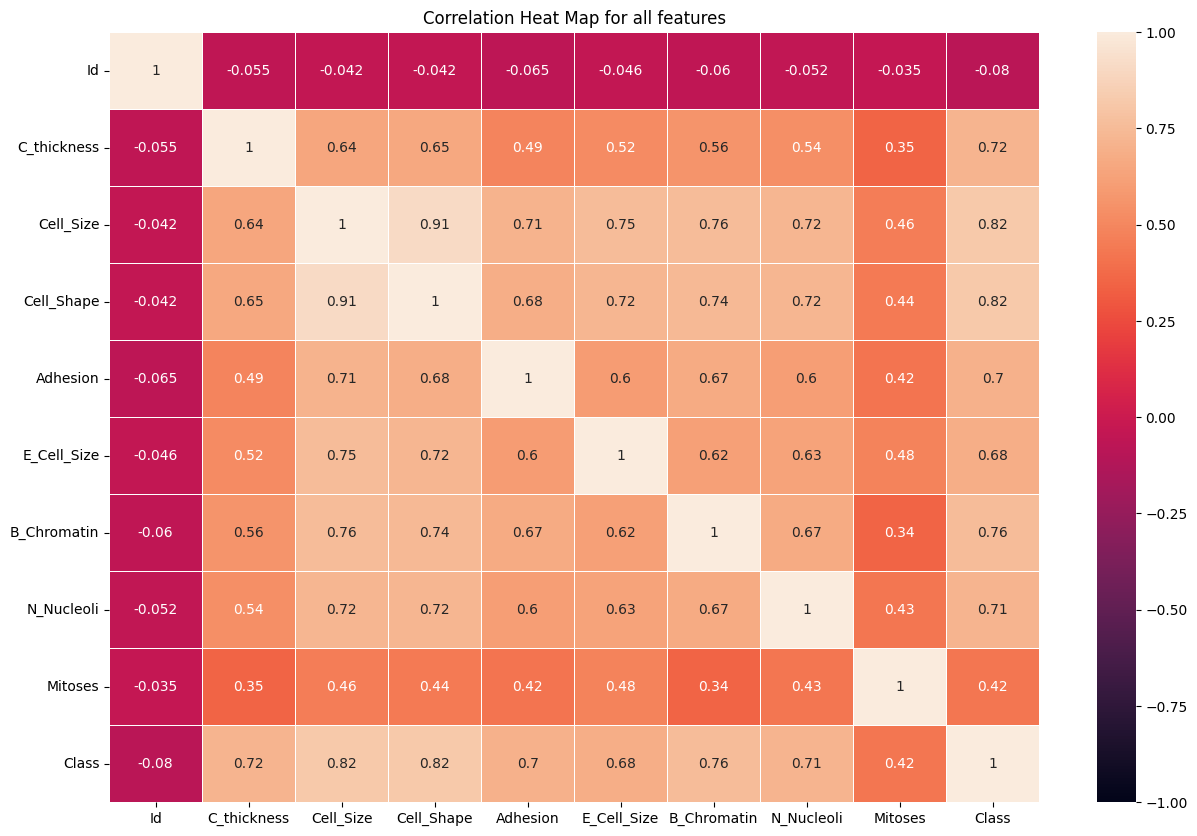

In [85]:
plt.figure(figsize = (15,10))
sns.heatmap(breast.corr(), annot=True,linewidth=.5, vmin=-1, vmax=1)
plt.title("Correlation Heat Map for all features")

- High correlation(0.91) between Cell_Size & Cell_Shape, so dropping Cell_Size

In [86]:
breast.drop("Cell_Size",axis = 1, inplace = True)
breast.head()

,Id,C_thickness,Cell_Shape,Adhesion,E_Cell_Size,Bare_Nuclei,B_Chromatin,N_Nucleoli,Mitoses,Class
0,1000025,5,1,1,2,1,3,1,1,2
1,1002945,5,4,5,7,10,3,2,1,2
2,1015425,3,1,1,2,2,3,1,1,2
3,1016277,6,8,1,3,4,3,7,1,2
4,1017023,4,1,3,2,1,3,1,1,2


In [87]:
breast.dtypes

Id              int64
C_thickness     int64
Cell_Shape      int64
Adhesion        int64
E_Cell_Size     int64
Bare_Nuclei    object
B_Chromatin     int64
N_Nucleoli      int64
Mitoses         int64
Class           int64
dtype: object

In [88]:
breast['Bare_Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [89]:
breast['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [90]:
breast['Bare_Nuclei'] = breast['Bare_Nuclei'].replace("?",np.nan)

In [91]:
breast.dtypes

Id              int64
C_thickness     int64
Cell_Shape      int64
Adhesion        int64
E_Cell_Size     int64
Bare_Nuclei    object
B_Chromatin     int64
N_Nucleoli      int64
Mitoses         int64
Class           int64
dtype: object

In [92]:
breast['Bare_Nuclei'].isnull().sum()

16

In [93]:
breast['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [94]:
breast["Bare_Nuclei"] = breast['Bare_Nuclei'].apply(lambda x: int(x) if x is not np.nan else x)

Text(0.5, 1.0, 'Correlation Heat Map for\xa0all\xa0features')

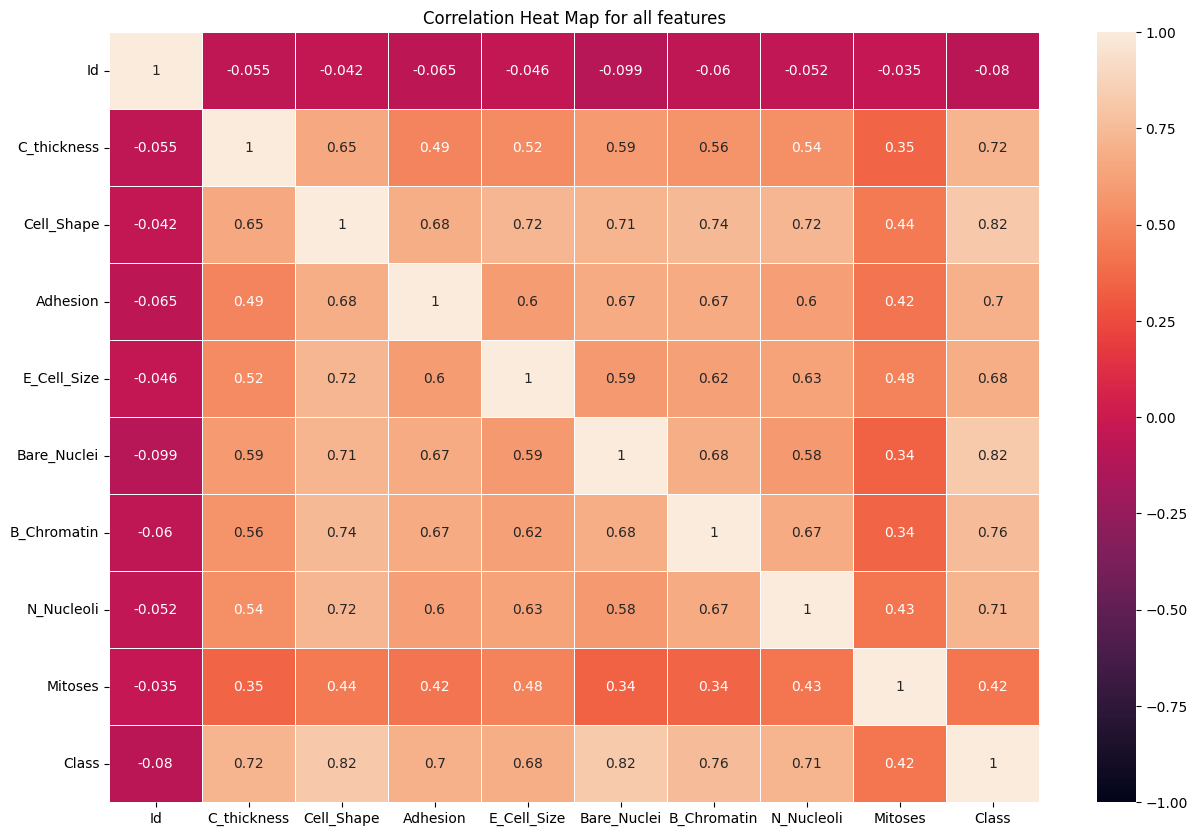

In [95]:
plt.figure(figsize = (15,10))
sns.heatmap(breast.corr(), annot=True,linewidth=.5, vmin=-1, vmax=1)
plt.title("Correlation Heat Map for all features")

**TODO 3**



Considering the fundamental idea of k-NN, would you recommend data rescaling before model building? Why? 

If so, partition the data into 75% training and 25% validation set.

Impute the missing values with the mean values of training data.
Check if all the nulls are removed in both train and test dataset.

Standardize the data.

**Note:**   When you standardize the validation set, you need to use the training set's mean and variance. 


### Sol

- Before using KNN scaling is always a good idea because the distance metric used for finding suimilarities in KNN algo will overshadow the other predictors if the scale is different.

- The higher the scale the bias on the value we get out of the distance value

Hence the scaling

In [96]:
X = breast.drop(["Class","Id"], axis = 1)
y = breast["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((524, 8), (175, 8), (524,), (175,))

In [97]:
breast.dtypes

Id               int64
C_thickness      int64
Cell_Shape       int64
Adhesion         int64
E_Cell_Size      int64
Bare_Nuclei    float64
B_Chromatin      int64
N_Nucleoli       int64
Mitoses          int64
Class            int64
dtype: object

In [98]:
mean1 = X_train["Bare_Nuclei"].mean()
X_train["Bare_Nuclei"].fillna(value = mean1.round(2),inplace = True)
X_test["Bare_Nuclei"].fillna(value = mean1.round(2), inplace = True)
X_train

,C_thickness,Cell_Shape,Adhesion,E_Cell_Size,Bare_Nuclei,B_Chromatin,N_Nucleoli,Mitoses
411,1,1,1,1,3.57,2,1,1
2,3,1,1,2,2.00,3,1,1
535,1,3,2,2,1.00,3,1,1
600,3,1,1,2,1.00,2,1,1
212,1,1,1,2,1.00,3,1,1
...,...,...,...,...,...,...,...,...
394,1,3,1,2,1.00,2,1,1
604,5,2,8,5,10.00,8,1,2
428,1,1,1,2,1.00,2,1,1
657,5,5,1,8,1.00,3,6,1


In [100]:
X_train.isnull().sum()

C_thickness    0
Cell_Shape     0
Adhesion       0
E_Cell_Size    0
Bare_Nuclei    0
B_Chromatin    0
N_Nucleoli     0
Mitoses        0
dtype: int64

In [101]:
train_mean = X_train.mean()
train_std = X_train.std()

In [102]:
X_train = (X_train - train_mean)/train_std
X_train

,C_thickness,Cell_Shape,Adhesion,E_Cell_Size,Bare_Nuclei,B_Chromatin,N_Nucleoli,Mitoses
411,-1.215258,-0.751668,-0.627722,-1.007736,-0.001212,-0.595753,-0.611974,-0.35940
2,-0.512005,-0.751668,-0.627722,-0.552125,-0.434880,-0.181728,-0.611974,-0.35940
535,-1.215258,-0.079528,-0.284016,-0.552125,-0.711102,-0.181728,-0.611974,-0.35940
600,-0.512005,-0.751668,-0.627722,-0.552125,-0.711102,-0.595753,-0.611974,-0.35940
212,-1.215258,-0.751668,-0.627722,-0.552125,-0.711102,-0.181728,-0.611974,-0.35940
...,...,...,...,...,...,...,...,...
394,-1.215258,-0.079528,-0.627722,-0.552125,-0.711102,-0.595753,-0.611974,-0.35940
604,0.191247,-0.415598,1.778217,0.814710,1.774892,1.888396,-0.611974,0.19126
428,-1.215258,-0.751668,-0.627722,-0.552125,-0.711102,-0.595753,-0.611974,-0.35940
657,0.191247,0.592612,-0.627722,2.181545,-0.711102,-0.181728,1.027465,-0.35940


In [103]:
X_test = (X_test - train_mean)/train_std
X_test

,C_thickness,Cell_Shape,Adhesion,E_Cell_Size,Bare_Nuclei,B_Chromatin,N_Nucleoli,Mitoses
201,1.949378,1.600821,0.403395,3.092768,1.774892,1.888396,-0.611974,-0.35940
343,-1.215258,-0.751668,-0.627722,-0.552125,-0.711102,-1.009778,-0.611974,-0.35940
120,-1.215258,-0.415598,-0.284016,-0.552125,-0.711102,-0.181728,-0.611974,-0.35940
59,1.597752,0.592612,-0.284016,-0.552125,-0.434880,0.646321,-0.611974,-0.35940
634,-0.512005,-0.751668,-0.627722,-0.552125,-0.711102,-1.009778,-0.611974,-0.35940
...,...,...,...,...,...,...,...,...
610,1.949378,-0.079528,2.465628,-0.096513,1.774892,1.474371,-0.611974,0.19126
500,0.542873,-0.751668,-0.627722,-0.552125,-0.711102,-0.181728,-0.611974,-0.35940
156,-1.215258,-0.415598,-0.627722,-0.552125,-0.711102,-0.595753,-0.611974,-0.35940
696,0.191247,2.272961,0.059689,1.725933,-0.158659,1.888396,2.339016,0.19126


In [104]:
X_test.isnull().sum()

C_thickness    0
Cell_Shape     0
Adhesion       0
E_Cell_Size    0
Bare_Nuclei    0
B_Chromatin    0
N_Nucleoli     0
Mitoses        0
dtype: int64

**TODO 4**

Choose the best k from 1-10 based on the classification accuracy of different k values on the validation set.

In [108]:
score = []
k= []
model = []
confusion = []
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(accuracy_score(y_test, y_pred))
  k.append(i)
  model.append(knn)
  #print("K = ", i, " ",accuracy_score(y_test, y_pred))
  #target_names = [2,4]
  #print(classification_report(y_test, y_pred, target_names=target_names))
df_res = pd.DataFrame({ 
    "K_value" : k,
    "Model" : model,
    "Accuracy": score
    })
df_res

,K_value,Model,Accuracy
0,1,KNeighborsClassifier(n_neighbors=1),0.931429
1,2,KNeighborsClassifier(n_neighbors=2),0.920000
2,3,KNeighborsClassifier(n_neighbors=3),0.942857
3,4,KNeighborsClassifier(n_neighbors=4),0.937143
4,5,KNeighborsClassifier(),0.942857
5,6,KNeighborsClassifier(n_neighbors=6),0.942857
6,7,KNeighborsClassifier(n_neighbors=7),0.948571
7,8,KNeighborsClassifier(n_neighbors=8),0.948571
8,9,KNeighborsClassifier(n_neighbors=9),0.960000
9,10,KNeighborsClassifier(n_neighbors=10),0.948571


In [109]:
df_res.sort_values("Accuracy",inplace = True,ascending = False)
df_res

,K_value,Model,Accuracy
8,9,KNeighborsClassifier(n_neighbors=9),0.960000
6,7,KNeighborsClassifier(n_neighbors=7),0.948571
7,8,KNeighborsClassifier(n_neighbors=8),0.948571
9,10,KNeighborsClassifier(n_neighbors=10),0.948571
2,3,KNeighborsClassifier(n_neighbors=3),0.942857
4,5,KNeighborsClassifier(),0.942857
5,6,KNeighborsClassifier(n_neighbors=6),0.942857
3,4,KNeighborsClassifier(n_neighbors=4),0.937143
0,1,KNeighborsClassifier(n_neighbors=1),0.931429
1,2,KNeighborsClassifier(n_neighbors=2),0.920000


<Axes: xlabel='K_value', ylabel='Accuracy'>

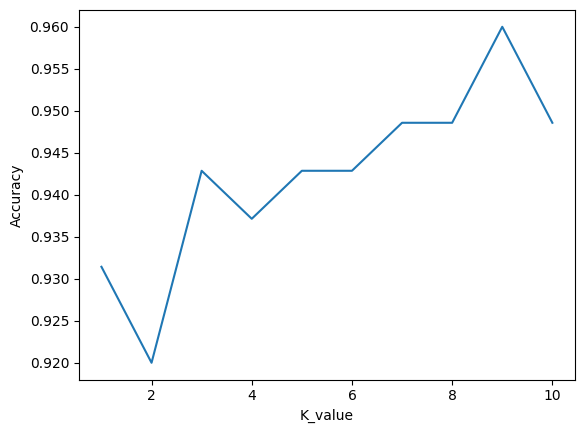

In [110]:
sns.lineplot(data = df_res, x= 'K_value', y = 'Accuracy')

Given the limit provided k between 1-10 the best is K = 9

**TODO 5**

For the chosen k, display the confusion matrix and evaluate the performance of the model using recall and precision.

Check for overfitting and underfitting for the k chosen.

              precision    recall  f1-score   support

           2       0.97      0.97      0.97       115
           4       0.95      0.93      0.94        60

    accuracy                           0.96       175
   macro avg       0.96      0.95      0.96       175
weighted avg       0.96      0.96      0.96       175



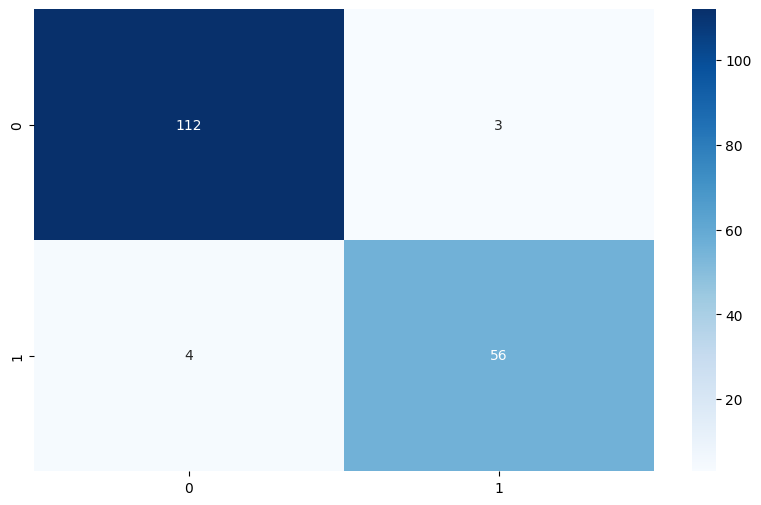

In [111]:
model = df_res.iloc[0]["Model"]
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
print(classification_report(y_test, pred))


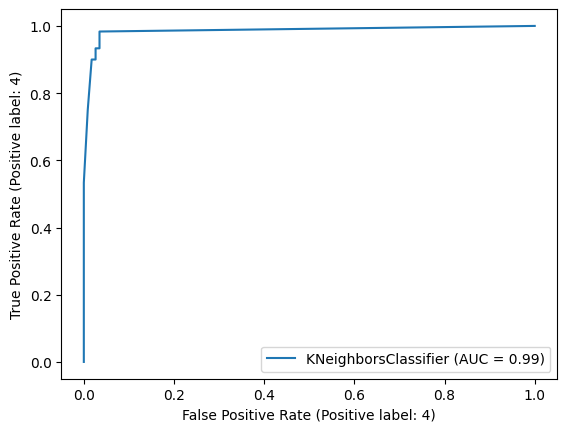

In [112]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

From the above ROC and precision and recal values we can say the choosen k is good enough without any underfitting and overfittting

**TODO 6**

Classify the new record given below using the chosen k. 

1002945, 5, 4, 4, 5, 7, 10, 3, 2, 1

Considering the size of the dataset, would you recommend data partition before scoring the new record? Why?

In [113]:
test = [5,4,5,7,10,3,2,1]
test = (test - train_mean)/train_std
test

C_thickness    0.191247
Cell_Shape     0.256542
Adhesion       0.747100
E_Cell_Size    1.725933
Bare_Nuclei    1.774892
B_Chromatin   -0.181728
N_Nucleoli    -0.284086
Mitoses       -0.359400
dtype: float64

In [28]:
pred = model.predict(np.array(test).reshape(1, -1))
pred

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([4])

- Yes, I would recommend partitioning the data into training and test sets before scoring the new record using KNN.

KNN is a non-parametric algorithm that relies on the entire dataset for making predictions. This means that the computational cost of KNN can be quite high, especially for large datasets.

- For the given new record the result is Class = 4

### Problem 3 ##

The data concerns city-cycle fuel consumption in miles per gallon (mpg). The objective is to use k-NN regression to predict the mpg with the given attributes.

**TODO 1**

Check the unique value of the variable "car name". 

Would you recommend keeping "car name" for prediction? Why? 

If not, eliminate the variable "car name".

In [120]:
# import the dataset "auto_mpg.csv"
auto_mgp = pd.read_csv('auto_mpg.csv')
auto_mgp.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [121]:
auto_mgp["car name"].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'ford torino 500', 'amc matador',
       'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900', 'peugeot 304

In [122]:
print(auto_mgp["car name"].nunique())
print(auto_mgp.shape[0])

301
393


- Out of 393 entries the count of carname with unique values is 301 which imples it doesnt discriminate or offer any statstical advantage in predicting mpg

So dropping "car name"

In [123]:
auto_mgp.drop("car name",axis = 1, inplace = True)
auto_mgp.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


**TODO 2**

Convert the variable "origin" to dummy variables before modeling

In [124]:
auto_mgp["origin"].unique()


array([1, 3, 2])

In [125]:
auto_mgp = pd.get_dummies(auto_mgp, columns = ['origin'])
auto_mgp

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
388,27.0,4,140.0,86,2790,15.6,82,1,0,0
389,44.0,4,97.0,52,2130,24.6,82,0,1,0
390,32.0,4,135.0,84,2295,11.6,82,1,0,0
391,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [126]:
auto_mgp.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin_1          uint8
origin_2          uint8
origin_3          uint8
dtype: object

In [127]:
auto_mgp["horsepower"].unique()
auto_mgp["horsepower"].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
?       1
61      1
93      1
148     1
82      1
Name: horsepower, Length: 94, dtype: int64

In [128]:
auto_mgp = auto_mgp[auto_mgp.horsepower != "?"]

In [129]:
auto_mgp["horsepower"].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: horsepower, Length: 93, dtype: int64

In [130]:
auto_mgp["horsepower"] = auto_mgp['horsepower'].apply(lambda x: int(x))

<ipython-input-130-4c7bf98f5d47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_mgp["horsepower"] = auto_mgp['horsepower'].apply(lambda x: int(x))


In [131]:
auto_mgp.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin_1          uint8
origin_2          uint8
origin_3          uint8
dtype: object

**TODO 3**

Partition the data into 75% training and 25% validation set.

In [132]:
X = auto_mgp.drop(["mpg"], axis = 1)
y = auto_mgp["mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((294, 9), (98, 9), (294,), (98,))

**TODO 4**

Rescale the numeric data. Note that dummy variables should not be rescaled.

**Note:** When you standardize the validation set, you need to use the training set's mean and variance.

In [133]:
X_train.dtypes

cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin_1          uint8
origin_2          uint8
origin_3          uint8
dtype: object

In [134]:
X_train_std = X_train.drop(["origin_1","origin_2","origin_3"],axis = 1)
X_test_std = X_test.drop(["origin_1","origin_2","origin_3"],axis = 1)
X_train_std

,cylinders,displacement,horsepower,weight,acceleration,model year
266,4,134.0,95,2560,14.2,78
16,6,199.0,97,2774,15.5,70
66,8,429.0,208,4633,11.0,72
159,6,231.0,110,3907,21.0,75
7,8,440.0,215,4312,8.5,70
...,...,...,...,...,...,...
71,8,304.0,150,3892,12.5,72
106,6,232.0,100,2789,15.0,73
271,4,151.0,85,2855,17.6,78
349,4,98.0,65,2380,20.7,81


In [135]:
train_mean = X_train_std.mean()
train_std = X_train_std.std()

In [136]:
X_train_std = (X_train_std - train_mean)/train_std
X_train_std

,cylinders,displacement,horsepower,weight,acceleration,model year
266,-0.858059,-0.587475,-0.245408,-0.489242,-0.457523,0.510470
16,0.309854,0.033605,-0.193594,-0.235016,-0.002500,-1.680451
66,1.477767,2.231273,2.682037,1.973422,-1.577580,-1.132721
159,0.309854,0.339368,0.143191,1.110955,1.922597,-0.311126
7,1.477767,2.336379,2.863383,1.592083,-2.452624,-1.680451
...,...,...,...,...,...,...
71,1.477767,1.036888,1.179455,1.093136,-1.052553,-1.132721
106,0.309854,0.348923,-0.115875,-0.217197,-0.177509,-0.858856
271,-0.858059,-0.425038,-0.504474,-0.138791,0.732537,0.510470
349,-0.858059,-0.931458,-1.022605,-0.703077,1.817592,1.332065


In [137]:
X_test_std = (X_test_std - train_mean)/train_std
X_test_std

,cylinders,displacement,horsepower,weight,acceleration,model year
78,-0.858059,-0.950568,-0.918979,-0.929979,0.872544,-1.132721
275,-0.858059,-0.711691,0.272724,-0.210069,0.067503,0.510470
247,-0.858059,-0.998343,-1.152138,-1.392100,0.312516,0.510470
55,-0.858059,-0.998343,-0.893072,-1.207965,1.747588,-1.406586
388,-0.858059,-0.530144,-0.478567,-0.216009,0.032502,1.605930
...,...,...,...,...,...,...
366,-0.858059,-0.797687,-0.504474,-0.471423,0.242512,1.605930
251,0.309854,0.339368,0.013658,0.669030,1.292565,0.510470
210,0.309854,-0.262602,0.402257,1.007602,0.417521,-0.037261
75,-0.858059,-0.711691,0.195004,-0.046129,-0.352518,-1.132721


In [138]:
X_train.loc[:,["origin_1","origin_2","origin_3"]]

,origin_1,origin_2,origin_3
266,0,0,1
16,1,0,0
66,1,0,0
159,1,0,0
7,1,0,0
...,...,...,...
71,1,0,0
106,1,0,0
271,1,0,0
349,1,0,0


In [139]:
x_train = pd.concat([X_train_std, X_train.loc[:,["origin_1","origin_2","origin_3"]]], axis = 1)
x_test = pd.concat([X_test_std , X_test.loc[:,["origin_1","origin_2","origin_3"]]],axis = 1)
x_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
78,-0.858059,-0.950568,-0.918979,-0.929979,0.872544,-1.132721,0,1,0
275,-0.858059,-0.711691,0.272724,-0.210069,0.067503,0.510470,0,1,0
247,-0.858059,-0.998343,-1.152138,-1.392100,0.312516,0.510470,0,0,1
55,-0.858059,-0.998343,-0.893072,-1.207965,1.747588,-1.406586,1,0,0
388,-0.858059,-0.530144,-0.478567,-0.216009,0.032502,1.605930,1,0,0
...,...,...,...,...,...,...,...,...,...
366,-0.858059,-0.797687,-0.504474,-0.471423,0.242512,1.605930,1,0,0
251,0.309854,0.339368,0.013658,0.669030,1.292565,0.510470,1,0,0
210,0.309854,-0.262602,0.402257,1.007602,0.417521,-0.037261,0,1,0
75,-0.858059,-0.711691,0.195004,-0.046129,-0.352518,-1.132721,0,1,0


**TODO 5**

Choose the best k from 1-10 based on the MSE of different k values on the validation set. Explain the reason for your choice.

In [140]:
score = []
k= []
model = []
confusion = []
for i in range(1,11):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  score.append(mean_squared_error(y_test, y_pred))
  k.append(i)
  model.append(knn)
  #print("K = ", i, " ",accuracy_score(y_test, y_pred))
  #target_names = [2,4]
  #print(classification_report(y_test, y_pred, target_names=target_names))
df_res = pd.DataFrame({ 
    "K_value" : k,
    "Model" : model,
    "MSE": score
    })
df_res

,K_value,Model,MSE
0,1,KNeighborsRegressor(n_neighbors=1),9.652551
1,2,KNeighborsRegressor(n_neighbors=2),7.486913
2,3,KNeighborsRegressor(n_neighbors=3),7.340351
3,4,KNeighborsRegressor(n_neighbors=4),6.915886
4,5,KNeighborsRegressor(),6.741837
5,6,KNeighborsRegressor(n_neighbors=6),7.053152
6,7,KNeighborsRegressor(n_neighbors=7),7.359584
7,8,KNeighborsRegressor(n_neighbors=8),7.741679
8,9,KNeighborsRegressor(n_neighbors=9),8.305762
9,10,KNeighborsRegressor(n_neighbors=10),8.779091


**TODO 6**


Score the validation set with the best k. Comment on the model performance.

In [141]:
df_res.sort_values("MSE",inplace = True)
df_res

,K_value,Model,MSE
4,5,KNeighborsRegressor(),6.741837
3,4,KNeighborsRegressor(n_neighbors=4),6.915886
5,6,KNeighborsRegressor(n_neighbors=6),7.053152
2,3,KNeighborsRegressor(n_neighbors=3),7.340351
6,7,KNeighborsRegressor(n_neighbors=7),7.359584
1,2,KNeighborsRegressor(n_neighbors=2),7.486913
7,8,KNeighborsRegressor(n_neighbors=8),7.741679
8,9,KNeighborsRegressor(n_neighbors=9),8.305762
9,10,KNeighborsRegressor(n_neighbors=10),8.779091
0,1,KNeighborsRegressor(n_neighbors=1),9.652551


<Axes: xlabel='K_value', ylabel='MSE'>

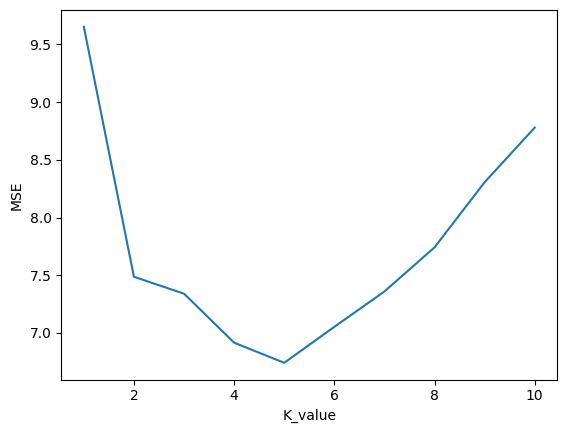

In [142]:
sns.lineplot(data = df_res, x= 'K_value', y = 'MSE')

- we take K = 5 as for that we have least MSE

# Naive Bayes

### **Problem 4**##

In this problem, we need to build a Naive Bayes model to classify whether a movie review is positive or negative. 

The given data is a subset of [the IMDB movie review dataset](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).

This might be your first time working with text mining. Therefore, the basic pre-processing steps are given below. 

**You have two major tasks:**

* Go through the code and get to know the purpose of each preprocessing step. Summarize what a preprocessing step does when required.
* Build a multinomial Naive Bayes model to classify the reviews.

In [143]:
# # Please remove # and run the following code if you have an error while importing the dataset
# !pip install --upgrade openpyxl

In [172]:
# Import the dataset
import pandas as pd
from google.colab import files
file = files.upload()
df = pd.read_csv("IMDB Dataset_subset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [173]:
# Packages required for preprocessing #
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer #for lemmatization
import re #regular expression package
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [174]:
X = [row for row in df['review']] #list of reviews
classes = df['sentiment'] #list of true classes

In [175]:
# Pre-process the data
reviews = []
lemmatizer = WordNetLemmatizer() 

for review in range(0, len(X)):
    # part 1
    review = re.sub(r'[\W_]', ' ', str(X[review])) 
    review = re.sub(r'\s+[a-zA-Z]\s+', ' ', review) 
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review) 
    review = re.sub(r'\s+', ' ', review, flags=re.I) 
    review = re.sub(r'^b\s+', '', review) # if a review record is in bytes, the corresponding line will have a letter 'b' appended at the start)
    review = review.lower()
    review = re.sub(r'[0-9]+', '', review) 

    # part 2
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)

    reviews.append(review)

In [176]:
reviews[0]

'one of the other reviewer ha mentioned that after watching just oz episode you ll be hooked they are right a this is exactly what happened with me br br the first thing that struck me about oz wa it brutality and unflinching scene of violence which set in right from the word go trust me this is not show for the faint hearted or timid this show pull no punch with regard to drug sex or violence it is hardcore in the classic use of the word br br it is called oz a that is the nickname given to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cell have glass front and face inwards so privacy is not high on the agenda em city is home to many aryan muslim gangsta latino christian italian irish and more so scuffle death stare dodgy dealing and shady agreement are never far away br br would say the main appeal of the show is due to the fact that it go where other show wouldn dare forget pretty picture painted for


**TODO 1**

Explain the function that part 1 and part 2 achieve in the loop.

---------------------------- Part 1 --------------------------------------------

- The code you provided is using the re.sub() function from the re with the regular expression pattern [\W_] matches any non-word character at the end replaces all non-alphanumeric characters with spaces.

- The regular expression pattern \s+[a-zA-Z]\s+ matches a sequence of one or more whitespace characters followed by a single letter both upper and lower case and followed by one or more whitespace characters with spaces.

- The regular expression pattern ^\^[a-zA-Z]\s+ with extra symbol (^) at the beginning of a line will replace all occurrences of a single letter both upper and lower case and followed by one or more whitespace characters with spaces.

- The regular expression pattern \s+ matches one or more whitespace characters including spaces, tabs, and newlines and replace with one space.(Consistency)

- review = review.lower() 
    - Convert all characters in the review string to lowercase.
- The regular expression pattern [0-9]+ replaces one or more consecutive digits with spaces.


------------------------------- Part 2--------------------------------------
Apart from Split, join and append
- The lemmatizer.lemmatize() method reduces a word to its base or dictionary form.

In [177]:
# Continue with pre-processing
vectorizer = CountVectorizer(stop_words = "english", max_df=0.7, min_df=5) 
texts = vectorizer.fit_transform(reviews).toarray()  
vocab = vectorizer.vocabulary_ 
vocab = sorted(vocab.items(), key = lambda x: x[1])
vocab = [v[0] for v in vocab]

In [178]:
print(texts.shape)
print(classes.shape)
len(vocab)
reviews[0]

(4000, 8396)
(4000,)


'one of the other reviewer ha mentioned that after watching just oz episode you ll be hooked they are right a this is exactly what happened with me br br the first thing that struck me about oz wa it brutality and unflinching scene of violence which set in right from the word go trust me this is not show for the faint hearted or timid this show pull no punch with regard to drug sex or violence it is hardcore in the classic use of the word br br it is called oz a that is the nickname given to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cell have glass front and face inwards so privacy is not high on the agenda em city is home to many aryan muslim gangsta latino christian italian irish and more so scuffle death stare dodgy dealing and shady agreement are never far away br br would say the main appeal of the show is due to the fact that it go where other show wouldn dare forget pretty picture painted for


**TODO 2**

What do "texts" and "vocab" represent? What is the relationship between them?

- The vocab variable is then created to store the vocabulary of the tokenized text data. This is done by accessing the vocabulary_ attribute of the CountVectorizer

- Converts a collection of text documents to a matrix of token counts.
    - Given for the model and each row numeric array 
    - Each element in vocab is analogus to column variable name

**TODO 3**

Partition the data into 80% training and 20% validation set.

In [179]:
X_train, X_test, y_train, y_test = train_test_split(texts, classes, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3200, 8396), (800, 8396), (3200,), (800,))

In [180]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**TODO 4**

Build a multinomial Naive Bayes model on the training set.

In [152]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(force_alpha=True)
clf.fit(X_train, y_train)

MultinomialNB(force_alpha=True)

**Hint:** [Multinomial Naive Bayes with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

**TODO 5**

Evaluate the model performance with the training and validation set. Comment on the model performance.

0.83


<Axes: >

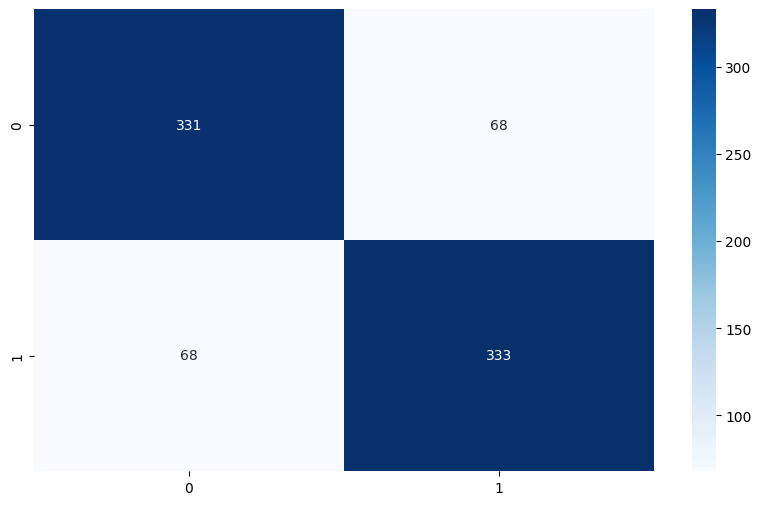

In [153]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.83      0.83      0.83       399
    positive       0.83      0.83      0.83       401

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



**Hint:** [Classification report with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

**If you are interested (this part is not graded):**

Explore one or two records that were misclassified. Check the original text, vectorized text, and comment on the possible reason why the record got misclassified.

In [165]:
mismatch = pd.DataFrame({
    "Test": y_test,
    "Predicted": y_pred
})
mismatch

,Test,Predicted
555,negative,negative
3491,positive,negative
527,negative,negative
3925,negative,negative
2989,positive,positive
...,...,...
1922,positive,positive
865,negative,negative
3943,positive,positive
1642,positive,negative


In [167]:
idx = mismatch.index[mismatch['Test'] != mismatch['Predicted']].tolist()
len(idx)

136

In [181]:
reviews[idx[0]]

'well m an italian horror big fan and love movie from director such argento fulci bava sr and bava jr only to quote the most famous la villa delle anime maledette is one of the most unknown movie of this genre shot when this kind of cinema began it crisis that continues still today and director carlo ausino sound totally new to my ear althoug he directed six movie this is the price italian director have to pay to not work in rome but the film is not so bad and it absolutely not correct to talk about trash ok the plot is not so original it reminds me stuff like the amytville series the year is the same of amityville possession by damiano damiani or shock the last work of mario bava but you have to think that this is the movie of cinematographer like mario bava movie so the most important thing is the atmosphere not the story or the character atmosphere very well created by the use of light and by the camera movement the rest remain in the background think the movie work not so good but 

In [182]:
X[idx[0]]

'Well, I\'m an Italian horror big fan and I love movies from directors such Argento, Fulci, Bava Sr and Bava Jr, only to quote the most famous. "La villa delle anime maledette" is one of the most unknown movie of this genre, shot when this kind of cinema began its crisis that continues still today, and director Carlo Ausino sounds totally new to my ears (althoug he directed six movies... this is the price Italian directors have to pay to not work in Rome...) . But the film is not so bad. And it\'s absolutely not correct to talk about "trash". OK, the plot is not so original; it reminds me stuff like the Amytville series (the year is the same of "Amityville Possession" by Damiano Damiani) or "Shock", the last work of Mario Bava. But you have to think that this is the movie of a cinematographer (like Mario Bava movies); so the most important thing is the atmosphere, not the story or the characters; atmosphere very well created by the use of light and by the camera movement. The rest rema

In [185]:
clf.predict(texts[idx[0]].reshape(1, -1))

array(['negative'], dtype='<U8')